In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [36]:
def read_tsp_file(file_path):
    """Reads a TSP file in TSPLIB format and extracts city coordinates."""
    with open(file_path, 'r') as file:
        lines = file.readlines()

    coords_start = lines.index("NODE_COORD_SECTION\n") + 1
    coords_end = lines.index("EOF\n")
    coords = []

    for line in lines[coords_start:coords_end]:
        parts = line.split()
        coords.append((float(parts[1]), float(parts[2])))

    return coords

coord = read_tsp_file("a280.tsp.txt")

In [ ]:
# Calculate pairwise distances
def calculate_distance_matrix(coords):
    n = len(coords)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_matrix[i, j] = math.sqrt((coords[i][0] - coords[j][0])**2 +
                                                 (coords[i][1] - coords[j][1])**2)
    return distance_matrix

dist_matrix = calculate_distance_matrix(coord)

[[ 0.         20.         24.08318916 ... 43.26661531 34.40930107
  17.88854382]
 [20.          0.         18.43908891 ... 36.22154055 28.
   8.94427191]
 [24.08318916 18.43908891  0.         ... 19.6977156  10.77032961
  10.        ]
 ...
 [43.26661531 36.22154055 19.6977156  ...  0.          8.94427191
  29.12043956]
 [34.40930107 28.         10.77032961 ...  8.94427191  0.
  20.39607805]
 [17.88854382  8.94427191 10.         ... 29.12043956 20.39607805
   0.        ]]


In [38]:
# Calculate total path length
def total_path_length(path, distance_matrix):
    return sum(distance_matrix[path[i - 1], path[i]] for i in range(len(path)))

In [40]:
# 2-opt move by reconnecting cities
def two_opt_reconnect(route, i, k):
    """
    Perform a 2-opt move by reconnecting the route without swapping the cities directly.
    Deletes two non-adjacent edges and reconnects them to form a new valid circuit.
    
    Args:
        route: A list representing the current route (list of city indices).
        i: Index of the first edge to be deleted.
        k: Index of the second edge to be deleted (k > i).
    
    Returns:
        A new route after performing the 2-opt move.
    """
    # Ensure i and k are valid
    if i >= k or i < 0 or k >= len(route):
        raise ValueError("Invalid indices for 2-opt move")
    
    # Reconnect the path
    new_route = route[:i + 1] + route[k:i:-1] + route[k + 1:]
    return new_route


In [41]:
# Cooling Strategies
def geometric_cooling(temp, cooling_rate):
    return temp * cooling_rate

def linear_cooling(temp, cooling_rate):
    return temp - cooling_rate

def logarithmic_cooling(temp, iteration):
    return temp / math.log(iteration + 1)

def exponential_cooling(temp, cooling_rate, iteration):
    return temp * np.exp(-cooling_rate * iteration)

In [ ]:
# Simulated Annealing
def simulated_annealing(distance_matrix, initial_temp, cooling_strategy, markov_length, max_iter=500, cooling_factor=None):
    n = len(distance_matrix)
    current_solution = list(range(n))
    random.shuffle(current_solution)
    current_cost = total_path_length(current_solution, distance_matrix)
   
    best_solution = current_solution
    best_cost = current_cost

    temperature = initial_temp
    iteration = 1

    while temperature > 1e-3:
        for _ in range(markov_length):
            i, k = sorted(random.sample(range(n), 2))  # Random indices for 2-opt
            new_solution = two_opt_reconnect(current_solution, i, k)
            new_cost = total_path_length(new_solution, distance_matrix)

            if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / temperature):
                current_solution = new_solution
                current_cost = new_cost

                if current_cost < best_cost:
                    best_solution = current_solution
                    best_cost = current_cost

        if cooling_strategy == "geometric_cooling_strategy":  
            new_temperature = geometric_cooling(temperature, cooling_factor)
        elif cooling_strategy == "linear_cooling_strategy":
            new_temperature = linear_cooling(temperature, cooling_factor)
        elif cooling_strategy == "logarithmic_cooling_strategy":
            new_temperature = logarithmic_cooling(initial_temp, iteration)
        elif cooling_strategy == "exponential_cooling_strategy":
            new_temperature = exponential_cooling(initial_temp, cooling_factor, iteration)

        temperature = new_temperature
        iteration += 1
        if iteration > max_iter:
            break

    return best_solution, best_cost

In [47]:
# Parameters
initial_temp = 1000
cooling_rate = 0.995
markov_length = 100
max_iter = 100000

# Run the algorithm
best_solution, best_cost = simulated_annealing(dist_matrix, initial_temp, "geometric_cooling_strategy" , markov_length, max_iter, cooling_rate)

# Output the results
print("Best Solution:", best_solution)
print("Best Cost:", best_cost)

Best Solution: [177, 149, 148, 138, 137, 139, 140, 147, 146, 141, 142, 145, 144, 143, 199, 201, 202, 203, 204, 211, 206, 205, 207, 252, 251, 208, 209, 250, 229, 228, 227, 226, 225, 224, 218, 217, 214, 213, 210, 212, 215, 216, 219, 220, 221, 222, 223, 233, 234, 235, 232, 231, 236, 237, 230, 245, 238, 244, 239, 240, 241, 1, 0, 279, 242, 243, 246, 249, 247, 278, 2, 3, 4, 5, 6, 8, 7, 9, 10, 11, 12, 14, 15, 270, 271, 272, 273, 274, 275, 276, 277, 248, 255, 254, 253, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 136, 135, 267, 134, 268, 269, 133, 132, 131, 18, 17, 16, 13, 23, 24, 22, 21, 25, 26, 27, 31, 32, 33, 30, 29, 124, 123, 122, 125, 28, 126, 127, 20, 19, 130, 129, 128, 153, 154, 152, 155, 151, 150, 176, 175, 174, 159, 158, 157, 156, 118, 119, 120, 121, 60, 117, 61, 59, 42, 41, 40, 39, 46, 38, 34, 35, 37, 36, 49, 50, 51, 48, 47, 52, 53, 54, 55, 45, 44, 43, 56, 58, 57, 67, 68, 69, 66, 70, 71, 72, 73, 75, 74, 76, 77, 78, 93, 94, 95, 96, 92, 97, 98, 99, 100, 168, 101, 91, 102, 103

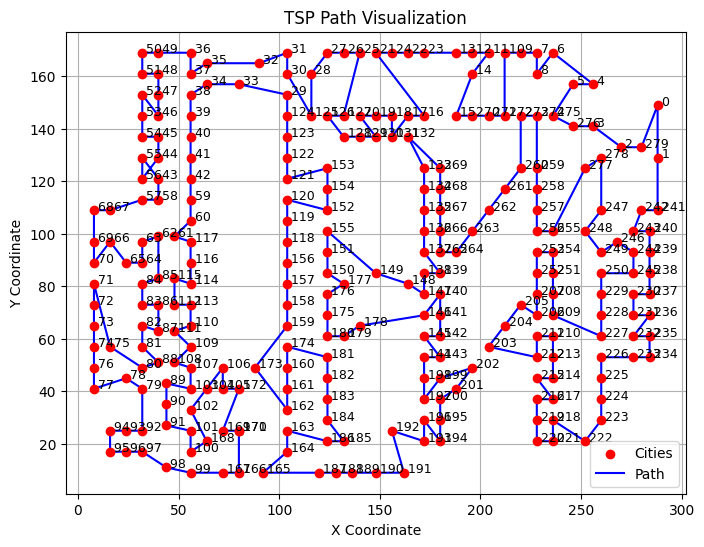

In [ ]:
def plot_tsp_path(cities, route):
    """
    Plot the cities and the path connecting them.
    
    Args:
        cities: A list of tuples representing the coordinates of cities (e.g., [(x1, y1), (x2, y2), ...]).
        route: A list of indices representing the order in which cities are visited.
    """
    # Extract coordinates in the order of the route
    x_coords = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y_coords = [cities[i][1] for i in route] + [cities[route[0]][1]]
    
    # Plot cities
    plt.figure(figsize=(12, 9))
    plt.scatter(*zip(*cities), color='red', s = 20, label='Cities', zorder=3)
    for idx, (x, y) in enumerate(cities):
        plt.text(x, y, f' {idx}', fontsize=9, zorder=4)
    
    # Plot the path
    plt.plot(x_coords, y_coords, color='blue', linestyle='-', linewidth=1.5, label='Path', zorder=2)
    
    # Add details
    plt.title("TSP Path Visualization")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_tsp_path(coord, best_solution)

In [75]:
# Parameters
initial_temp = np.linspace(100, 1000, 100)
cost_temp = []
sol_temp = []
cooling_rate = 0.999
markov_length = 605
max_iter = 10000


for temp in initial_temp:
    best_solution, best_cost = simulated_annealing(dist_matrix, temp, "geometric_cooling_strategy", markov_length, max_iter, cooling_rate)
    sol_temp.append(best_solution)
    cost_temp.append(best_cost)

plt.figure(figsize=(8, 6))
plt.plot(initial_temp, cost_temp, marker='o', color='blue')
plt.title("Simulated Annealing: Cost vs Initial Temperature")
plt.xlabel("Initial Temperature")
plt.ylabel("Total Path Length")
plt.grid(True)
plt.show()


KeyboardInterrupt: 

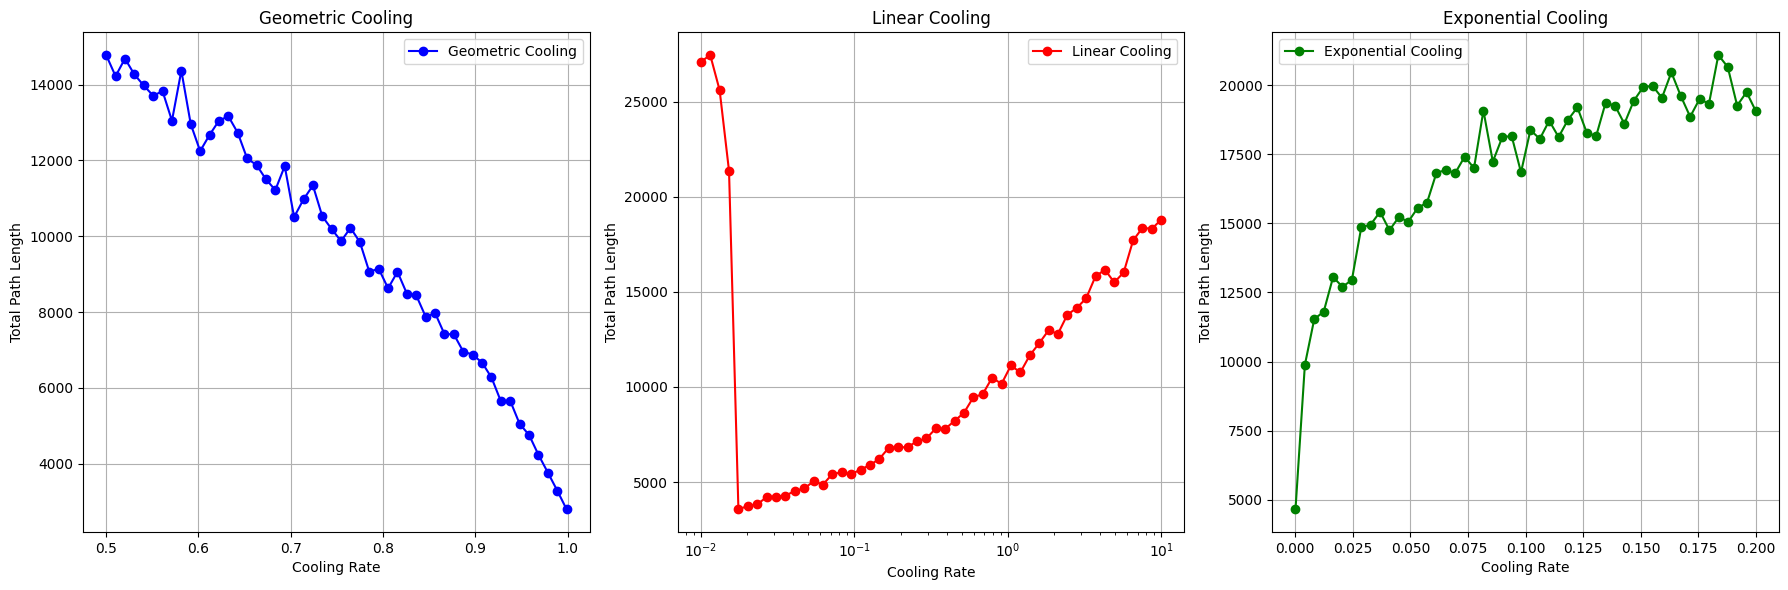

Geometric Cooling: Best Cost: 2791.860753764311
Linear Cooling: Best Cost: 3564.876133264483
Exponential Cooling: Best Cost: 4647.276982141842
Logarithmic Cooling: Best Cost: 16784.880171522625


In [ ]:
# Parameters
initial_temp = 1000
markov_length = 100
max_iter = 60000

# Geomnetric Cooling
rates_geo = np.linspace(0.5, 0.999, 50)
cost_geo = []
sol_geo = []

# Linear Cooling
rates_linear = np.logspace(-2, 1, 50)
cost_linear = []
sol_linear = []

# Exponential Cooling
rates_exp = np.linspace(0.0001, 0.2, 50)
cost_exp = []
sol_exp = []

for rate in rates_geo:
    best_solution, best_cost = simulated_annealing(dist_matrix, initial_temp, "geometric_cooling_strategy", markov_length, max_iter ,rate)
    sol_geo.append(best_solution)
    cost_geo.append(best_cost)

for rate in rates_linear:
    best_solution, best_cost = simulated_annealing(dist_matrix, initial_temp, "linear_cooling_strategy", markov_length, max_iter, rate)
    sol_linear.append(best_solution)
    cost_linear.append(best_cost)

for rate in rates_exp:
    best_solution, best_cost = simulated_annealing(dist_matrix, initial_temp, "exponential_cooling_strategy", markov_length, max_iter, rate)
    sol_exp.append(best_solution)
    cost_exp.append(best_cost)

best_solution, cost_log = simulated_annealing(dist_matrix, initial_temp, "logarithmic_cooling_strategy", markov_length, max_iter)

plt.rcParams['font.size'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Geometric Cooling
axes[0].plot(rates_geo, cost_geo, marker='o', color='blue', label='Geometric Cooling')
axes[0].set_title("Geometric Cooling")
axes[0].set_xlabel("Cooling Rate")
axes[0].set_ylabel("Total Path Length")
axes[0].legend()
axes[0].grid(True)

# Linear Cooling
axes[1].semilogx(rates_linear, cost_linear, marker='o', color='red', label='Linear Cooling')
axes[1].set_title("Linear Cooling")
axes[1].set_xlabel("Cooling Rate")
axes[1].set_ylabel("Total Path Length")
axes[1].legend()
axes[1].grid(True)

# Exponential Cooling
axes[2].plot(rates_exp, cost_exp, marker='o', color='green', label='Exponential Cooling')
axes[2].set_title("Exponential Cooling")
axes[2].set_xlabel("Cooling Rate")
axes[2].set_ylabel("Total Path Length")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

print("Geometric Cooling: Best Cost:", min(cost_geo))
print("Linear Cooling: Best Cost:", min(cost_linear))
print("Exponential Cooling: Best Cost:", min(cost_exp))
print("Logarithmic Cooling: Best Cost:", cost_log)


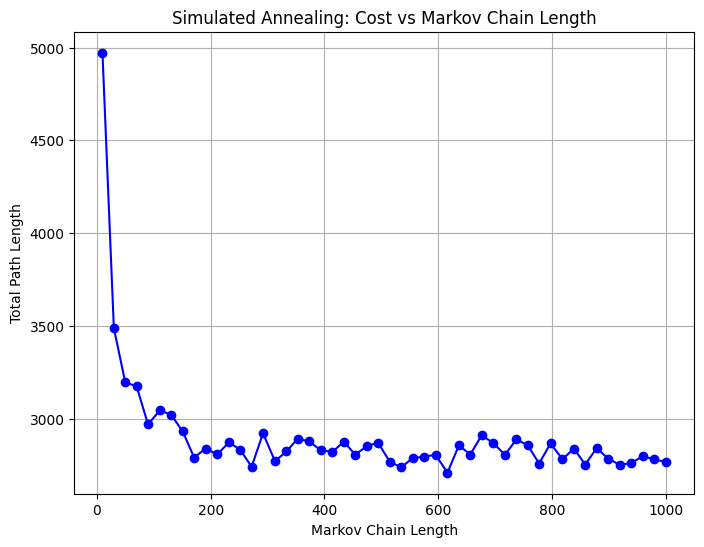

In [56]:
# Parameters
markov_lengths = np.linspace(10, 1000, 50, dtype=int)
initial_temp = 1000
cooling_rate = 0.995
max_iter = 5000

cost_markov = []
sol_markov = []

for markov_length in markov_lengths:
    best_solution, best_cost = simulated_annealing(dist_matrix, initial_temp, "geometric_cooling_strategy", markov_length, max_iter, cooling_rate)
    sol_markov.append(best_solution)
    cost_markov.append(best_cost)

plt.figure(figsize=(8, 6))
plt.plot(markov_lengths, cost_markov, marker='o', color='blue')
plt.title("Simulated Annealing: Cost vs Markov Chain Length")
plt.xlabel("Markov Chain Length")
plt.ylabel("Total Path Length")
plt.grid(True)
plt.show()

Best Solution: [181, 180, 175, 179, 178, 149, 177, 176, 150, 151, 155, 152, 154, 153, 126, 127, 128, 129, 20, 19, 130, 131, 18, 17, 16, 132, 133, 134, 135, 136, 137, 139, 138, 148, 147, 140, 141, 146, 145, 142, 143, 199, 144, 198, 197, 196, 193, 194, 195, 200, 201, 202, 203, 204, 205, 206, 207, 252, 251, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 250, 249, 246, 243, 244, 245, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 242, 241, 1, 0, 279, 2, 278, 277, 247, 248, 255, 254, 253, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 15, 270, 271, 272, 273, 274, 275, 276, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 12, 13, 23, 22, 24, 21, 25, 26, 27, 28, 31, 32, 30, 29, 124, 125, 123, 122, 121, 120, 119, 118, 156, 157, 158, 159, 174, 160, 161, 162, 163, 173, 172, 105, 106, 104, 103, 107, 109, 110, 111, 112, 113, 114, 116, 115, 85, 86, 83, 84, 64, 65, 63, 62, 61, 117, 60, 59, 42, 41, 40, 39, 38, 34, 33, 35, 3

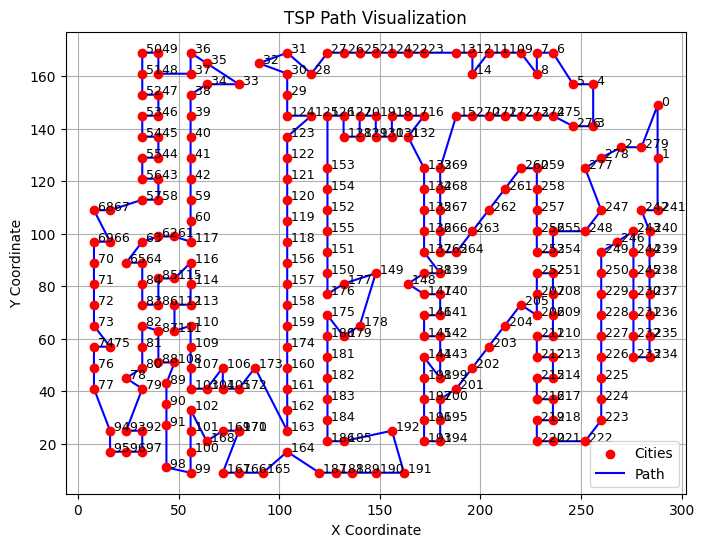

In [ ]:
# Optimal Parameters
initial_temp = 200
cooling_rate = 0.999
markov_length = 605
max_iter = 100000

best_solution, best_cost = simulated_annealing(dist_matrix, initial_temp, "geometric_cooling_strategy", markov_length, max_iter, cooling_rate)

print("Best Solution:", best_solution)
print("Best Cost:", best_cost)

optimal_280 = [
    1, 2, 242, 243, 244, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 
    231, 246, 245, 247, 250, 251, 230, 229, 228, 227, 226, 225, 224, 223, 
    222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 207, 
    206, 205, 204, 203, 202, 201, 198, 197, 196, 195, 194, 193, 192, 191, 
    190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 176, 180, 179, 150, 
    178, 177, 151, 152, 156, 153, 155, 154, 129, 130, 131, 20, 21, 128, 127, 
    126, 125, 124, 123, 122, 121, 120, 119, 157, 158, 159, 160, 175, 161, 
    162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 171, 173, 174, 107, 
    106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 
    90, 89, 109, 108, 110, 111, 112, 88, 87, 113, 114, 115, 117, 116, 86, 
    85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 
    67, 66, 65, 64, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 
    44, 59, 63, 62, 118, 61, 60, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 
    32, 31, 30, 29, 28, 27, 26, 22, 25, 23, 24, 14, 15, 13, 12, 11, 10, 9, 8, 
    7, 6, 5, 4, 277, 276, 275, 274, 273, 272, 271, 16, 17, 18, 19, 132, 133, 
    134, 270, 269, 135, 136, 268, 267, 137, 138, 139, 149, 148, 147, 146, 
    145, 199, 200, 144, 143, 142, 141, 140, 266, 265, 264, 263, 262, 261, 
    260, 259, 258, 257, 254, 253, 208, 209, 252, 255, 256, 249, 248, 278, 
    279, 3, 280
]

optimal = [el-1 for el in optimal_280]

# Optimal solutions
optimal_cost = total_path_length(optimal, dist_matrix)
print("Optimal cost", optimal_cost)

plot_tsp_path(coord, best_solution)

In [ ]:
coord1 = read_tsp_file("eil51.tsp.txt")
coord2 = read_tsp_file("pcb442.tsp.txt")

dist_matrix1 = calculate_distance_matrix(coord1)
dist_matrix2 = calculate_distance_matrix(coord2)

# Run the algorithm
best_solution1, best_cost1 = simulated_annealing(dist_matrix1, initial_temp, "geometric_cooling_strategy" , markov_length, max_iter, cooling_rate)
best_solution2, best_cost2 = simulated_annealing(dist_matrix2, initial_temp, "geometric_cooling_strategy" , markov_length, max_iter, cooling_rate)


# Output the results
print("Best Solution 51 cities:", best_solution1)
print("Best Cost:", best_cost1)

# Output the results
print("Best Solution 442 cities:", best_solution2)
print("Best Cost:", best_cost2)

Best Solution: [212, 210, 209, 211, 205, 203, 202, 204, 267, 17, 131, 154, 129, 130, 128, 126, 20, 132, 269, 268, 262, 261, 257, 259, 260, 258, 206, 207, 208, 255, 256, 253, 252, 251, 254, 248, 2, 3, 278, 277, 273, 272, 15, 16, 18, 22, 21, 24, 25, 26, 31, 27, 28, 29, 153, 119, 120, 121, 122, 123, 125, 127, 19, 155, 152, 118, 124, 30, 32, 33, 35, 36, 37, 52, 51, 50, 46, 47, 53, 54, 34, 49, 48, 38, 39, 41, 40, 42, 58, 60, 116, 117, 59, 43, 55, 44, 45, 61, 64, 57, 62, 56, 66, 68, 67, 69, 72, 63, 65, 84, 87, 82, 83, 85, 115, 114, 112, 113, 110, 111, 109, 107, 103, 108, 86, 73, 70, 71, 74, 75, 76, 77, 78, 80, 81, 88, 79, 90, 89, 104, 105, 106, 173, 159, 158, 157, 156, 175, 181, 180, 179, 183, 174, 160, 161, 162, 165, 187, 184, 185, 164, 163, 167, 166, 171, 170, 169, 168, 101, 100, 97, 95, 93, 96, 94, 92, 91, 98, 99, 102, 172, 182, 186, 189, 188, 190, 192, 196, 191, 194, 193, 200, 199, 201, 195, 197, 198, 144, 143, 141, 140, 142, 146, 145, 138, 148, 137, 265, 266, 139, 264, 147, 177, 178, 15